# k-NEAREST NEIGHBORS

**File:** kNN.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [16]:
# for error: confusion - matrix issue
pip install scikit-learn==1.2.2


SyntaxError: invalid syntax (1203921966.py, line 2)

In [17]:
# to correct error: Nonetype has no attribute split
pip install -U threadpoolctl

  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
from sklearn.model_selection import GridSearchCV     # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
#from sklearn.metrics import plot_confusion_matrix    # Evaluation measure


# newer version
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


# LOAD AND PREPARE DATA
Load the training data `trn` and testing data `tst` from the CSV files in the data directory. Separate the data matrix from the class variable.

In [2]:
# Imports the training data
trn = pd.read_csv('data/spambase_trn.csv')

# Separates the attributes X0-X56 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/spambase_tst.csv')

# Separates the attributes X0-X56 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

# Class labels
spam = ['Not Spam','Spam']

Look at the first few rows of the training data.

In [3]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


# kNN: TRAIN MODEL
To train a kNN model, set up a `KNeighborsClassifier` object and fit it to training data.

In [4]:
# Sets up a kNN model and fits it to data
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)

## Calculate Mean Accuracy on Training Data

In [5]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 86.77%


## Optimize the kNN Model
The challenge in training a kNN model is to determine the optimal number of neighbors. To find the optimal parameters, `GridSearchCV` object can be used.

In [6]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [7]:
best_knn.predict(X_tst)

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
spam

['Not Spam', 'Spam']

## Plot the Accuracy by Neighbors Parameter
Once the optimal parameters are found, the accuracy for different parameters can be compared by plotting. The `grid` variable has an attribute `cv_results_`, which is a dictionary of key value pairs and stores the cross validation accuracy for each parameter.

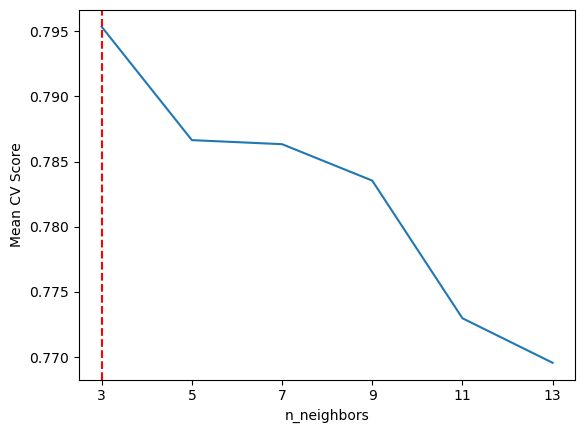

In [9]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draws a vertical line where the best model is
plt.axvline(
    x=best_knn.n_neighbors, 
    color='red', 
    ls='--')

# TEST MODEL
In this phase, we'll evaluate the accuracy of the trained kNN model on the test set. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

In [10]:
X_tst.shape
X_tst.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56
0,0.0,0.00,0.00,0.0,1.01,0.0,0.0,0.0,0.00,0.00,...,0.0,0.000,0.088,0.000,0.000,0.088,0.000,6.718,33,215
1,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.098,0.589,0.000,0.000,0.000,0.000,2.044,22,92
2,0.0,0.53,0.00,0.0,1.06,0.0,1.6,0.0,0.00,0.53,...,0.0,0.000,0.239,0.079,0.159,0.000,0.000,4.555,51,123
3,0.0,0.00,0.23,0.0,0.92,0.0,0.0,0.0,0.23,0.00,...,0.0,0.000,0.130,0.026,0.026,0.000,0.026,2.222,23,480
4,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.428,4,10


In [11]:
y_tst.shape
y_tst.head()

0    1
1    1
2    1
3    0
4    0
Name: y, dtype: int64

In [12]:
spam

['Not Spam', 'Spam']

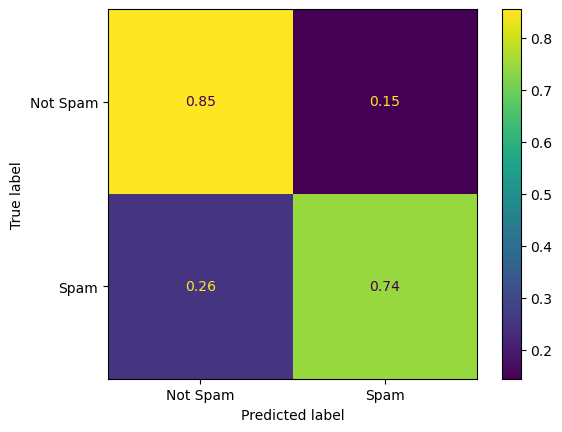

In [13]:
# plot_confusion_matrix(
#     best_knn, X_tst, y_tst,
#     display_labels=spam,
#     normalize='true')


cm = confusion_matrix(y_tst,best_knn.predict(X_tst), labels=[0,1], normalize='true')
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=spam)
disp.plot()
plt.show()

## Calculate Mean Accuracy on Testing Data

In [14]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 81.17%


# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.